In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Data Collecting
data = open('corpus',encoding="utf8").read()

labels, texts = [], []

for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# create a dataframe using texts and lables
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels


# EDA & Preprocessing

In [4]:
trainDF.head()

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


In [6]:
trainDF.shape

(10000, 2)

In [7]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
text     10000 non-null object
label    10000 non-null object
dtypes: object(2)
memory usage: 156.4+ KB


In [8]:
trainDF.describe()

,text,label
count,10000,10000
unique,10000,2
top,Awesome!: Just what I needed. Worked like a ch...,__label__1
freq,1,5097


In [10]:
trainDF.label.unique()

array(['__label__2', '__label__1'], dtype=object)

Convert labels into      0,1

In [11]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
trainDF['label'] = le.fit_transform(trainDF['label'])
trainDF.head()

,text,label
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


In [12]:
Sentiment_count=trainDF.groupby('label').count()
Sentiment_count

,text
label,
0,5097
1,4903


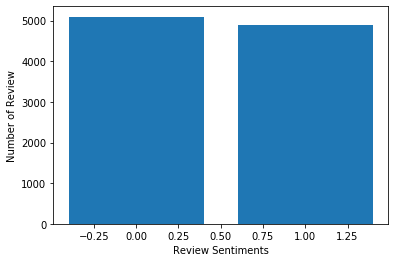

In [13]:
plt.bar(Sentiment_count.index.values, Sentiment_count['text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [40]:
#Feature Generation using Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(trainDF['text'])

In [41]:
#Split train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, trainDF['label'], test_size=0.3, random_state=1)

# Model Building


In [42]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.827


This is good model lets try other models to improve accuracy

# Feature Generation using TF-IDF


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(trainDF['text'])

#Split train and test set (TF-IDF)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, trainDF['label'], test_size=0.3, random_state=123)

# Model Building and Evaluation (TF-IDF)

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))


MultinomialNB Accuracy: 0.8283333333333334


In [45]:
from sklearn.neighbors import KNeighborsClassifier


for i in range(1,22,2):
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        predicted= knn.predict(X_test)
        print("MultinomialNB Accuracyat ",i,":",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracyat  1 : 0.67
MultinomialNB Accuracyat  3 : 0.7086666666666667
MultinomialNB Accuracyat  5 : 0.7343333333333333
MultinomialNB Accuracyat  7 : 0.7456666666666667
MultinomialNB Accuracyat  9 : 0.7533333333333333
MultinomialNB Accuracyat  11 : 0.7516666666666667
MultinomialNB Accuracyat  13 : 0.757
MultinomialNB Accuracyat  15 : 0.7596666666666667
MultinomialNB Accuracyat  17 : 0.7683333333333333
MultinomialNB Accuracyat  19 : 0.7746666666666666
MultinomialNB Accuracyat  21 : 0.7763333333333333


In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier(n_estimators=300, random_state=1)

RFC.fit(X_train,y_train)

y_pred=RFC.predict(X_test)
metrics.accuracy_score(y_pred,y_test)